In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

city= pd.read_csv("city_data.csv")
ride= pd.read_csv("ride_data.csv") 

city_ride= pd.merge(city, ride, how='outer', on='city')
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [33]:
city_ride_group= city_ride.groupby(["city"]).agg({'fare':'mean', 'ride_id':'count', "driver_count":"mean", "type":"first"})
city_ride_group.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [34]:
city_r= city_ride_group.loc[city_ride_group["type"]=="Rural",:]
city_r.head()

,fare,ride_id,driver_count,type
city,,,,
Bradshawfurt,40.064000,10,7,Rural
Garzaport,24.123333,3,7,Rural
Harringtonfort,33.470000,6,4,Rural
Jessicaport,36.013333,6,1,Rural
Lake Jamie,34.358333,6,4,Rural


In [36]:
city_u= city_ride_group.loc[city_ride_group["type"]=="Urban",:]
city_u.head()

,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Deanville,25.842632,19,49,Urban


In [37]:
city_s= city_ride_group.loc[city_ride_group["type"]=="Suburban",:]
city_s.head()

,fare,ride_id,driver_count,type
city,,,,
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Brandonfort,35.437368,19,10,Suburban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [72]:
plt.rcParams['figure.figsize']=(15,5)

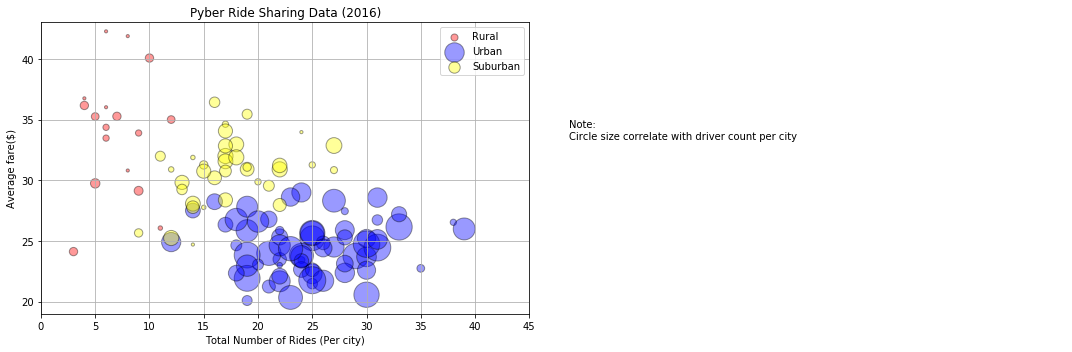

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = axes[0]
ax1.scatter(city_r["ride_id"],city_r["fare"], s=city_r["driver_count"]*10,facecolors="red", alpha= 0.4, edgecolors="black", label= "Rural")
ax1.scatter(city_u["ride_id"],city_u["fare"], s=city_u["driver_count"]*10,marker="o", facecolors="blue",alpha= 0.4, edgecolors="black", label="Urban")
ax1.scatter(city_s["ride_id"],city_s["fare"], s=city_s["driver_count"]*10,marker="o", facecolors="yellow",alpha= 0.4, edgecolors="black",label= "Suburban")            
ax2=axes[1]
ax2.axis("off")
ax2.text(0,0.6,"Note:\nCircle size correlate with driver count per city")
ax1.set_title("Pyber Ride Sharing Data (2016)")
ax1.set_ylabel("Average fare($)")
ax1.set_xlabel("Total Number of Rides (Per city)")
ax1.legend( loc="best")
ax1.grid()
ax1.set_ylim(19, 43)
ax1.set_xlim(0, 45)
fig.tight_layout()
plt.show()


In [13]:
city_ride_type_uf= city_ride.loc[city_ride["type"]=="Urban",:].groupby(["type"])
ufp= city_ride_type_uf["fare"].sum()
ufp

type
Urban    39854.38
Name: fare, dtype: float64

In [14]:
city_ride_type_rf= city_ride.loc[city_ride["type"]=="Rural",:].groupby(["type"])
rfp= city_ride_type_rf["fare"].sum()
rfp

type
Rural    4327.93
Name: fare, dtype: float64

In [15]:
city_ride_type_sf= city_ride.loc[city_ride["type"]=="Suburban",:].groupby(["type"])
sfp= city_ride_type_sf["fare"].sum()
sfp

type
Suburban    19356.33
Name: fare, dtype: float64

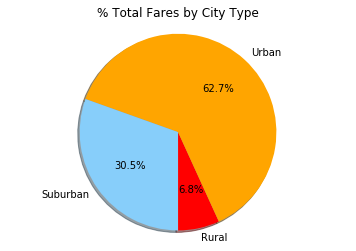

In [16]:

labels = ["Rural", "Urban", "Suburban"]

sizes = [4327.93, 39854.38,19356.33 ]

colors = ["red", "orange", "lightskyblue"]

explode = (0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% Total Fares by City Type")
plt.axis("equal")
plt.show()

In [17]:
city_ride_type_ud= city_ride.loc[city_ride["type"]=="Urban",:].groupby(["type"])
udr= city_ride_type_ud["ride_id"].count()
udr

type
Urban    1625
Name: ride_id, dtype: int64

In [18]:
city_ride_type_rd= city_ride.loc[city_ride["type"]=="Rural",:].groupby(["type"])
rdr= city_ride_type_rd["ride_id"].count()
rdr

type
Rural    125
Name: ride_id, dtype: int64

In [19]:
city_ride_type_sd= city_ride.loc[city_ride["type"]=="Suburban",:].groupby(["type"])
sdr= city_ride_type_sd["ride_id"].count()
sdr

type
Suburban    625
Name: ride_id, dtype: int64

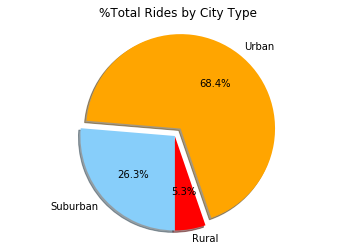

In [20]:
labels = ["Rural", "Urban", "Suburban"]

sizes = [125, 1625, 625]

colors = ["red", "orange", "lightskyblue"]

explode = (0., 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("%Total Rides by City Type")
plt.axis("equal")
plt.show()

In [21]:
city_ride_type_rdv= city_ride.loc[city_ride["type"]=="Rural",:].groupby(["type"])
rdv= city_ride_type_rdv["driver_count"].sum()
rdv

type
Rural    537
Name: driver_count, dtype: int64

In [22]:
city_ride_type_udv= city_ride.loc[city_ride["type"]=="Urban",:].groupby(["type"])
udv= city_ride_type_udv["driver_count"].sum()
udv

type
Urban    59602
Name: driver_count, dtype: int64

In [23]:
city_ride_type_sdv= city_ride.loc[city_ride["type"]=="Suburban",:].groupby(["type"])
sdv= city_ride_type_sdv["driver_count"].sum()
sdv

type
Suburban    8570
Name: driver_count, dtype: int64

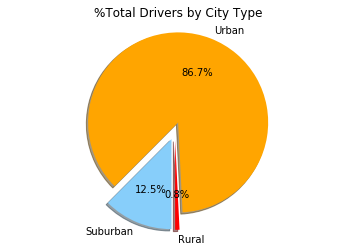

In [24]:
labels = ["Rural", "Urban", "Suburban"]

sizes = [537, 59602, 8570]

colors = ["red", "orange", "lightskyblue"]

explode = (0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("%Total Drivers by City Type")
plt.axis("equal")
plt.show()